Reference: https://scicomp.stackexchange.com/questions/27649/algorithms-to-extract-trajectory-lines-out-of-3d-point-clouds/27748

In [1]:
import numpy as np, pandas as pd, matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
from matplotlib import pyplot as plt

def f_plot(df, col="chi2"):
    plt.figure(dpi = 80, figsize=(5,4))
    first = plt.hist(df.loc[df.signal == True, col], normed = True, histtype="step", bins=50, label = 'signal')
    second = plt.hist(df.loc[df.signal == False, col], normed = True, histtype="step", bins=50, label = 'background')
    plt.title('{} distribution'.format(col))
    plt.legend(); plt.show()

In [2]:
odf = pd.read_csv('DS_2_train.csv', index_col=0)

/fefs/disk/usr100/gentoo/usr/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print(np.min(df.TX), np.max(df.TX))
print(np.min(df.TY), np.max(df.TY))

-0.998083846298 0.999545031159


-0.997622096082 0.998646796895


In [326]:
print(np.min(df.rX), np.max(df.rX))
print(np.min(df.rY), np.max(df.rY))

-42358.7457894 104472.924271


-23516.841195 101657.281073


In [327]:
print(np.min(df.eX), np.max(df.eX))
print(np.min(df.eY), np.max(df.eY))


0.785625699575 2.35523549484


0.786075222946 2.35500412351


In [7]:
plt.hist(df.X)

(array([  877431.,   972496.,   984669.,  1005570.,  1016988.,  1006813.,
         1010465.,  1012120.,  1011293.,   908541.]),
 array([ 27762.4140625,  32210.20625  ,  36657.9984375,  41105.790625 ,
         45553.5828125,  50001.375    ,  54449.1671875,  58896.959375 ,
         63344.7515625,  67792.54375  ,  72240.3359375]),
 <a list of 10 Patch objects>)

In [51]:
df['eX'] = np.arctan2(1, df.TX)
df['rX'] = df.Z*np.cos(df.eX) + df.X*np.sin(df.eX)
df['eY'] = np.arctan2(1, df.TY)
df['rY'] = df.Z*np.cos(df.eY) + df.Y*np.sin(df.eY)


In [75]:
df['fX'] = np.arccos(df.TX) # cos assumption
df['sX'] = df.Z*df.TX + df.X*np.sin(df.fX)
df['fY'] = np.arccos(df.TY)
df['sY'] = df.Z*df.TY + df.Y*np.sin(df.fY)


In [79]:
plt.hist(df['eX'], histtype="step"); plt.hist(df['fX'], histtype="step"); plt.xlabel("thetaX");plt.show()
plt.hist(df['rX'], histtype="step"); plt.hist(df['sX'], histtype="step"); plt.xlabel("rhoX"); plt.show()


In [80]:
plt.hist(df['eY'], histtype="step"); plt.hist(df['fY'], histtype="step"); plt.xlabel("thetaY");plt.show()
plt.hist(df['rY'], histtype="step"); plt.hist(df['sY'], histtype="step"); plt.xlabel("rhoY"); plt.show()


In [264]:
dfs = df.query("signal==1 & brick_number==27")
df0 = df.query("signal==0 & brick_number==27")
dfa = df.query("brick_number==27")
N=100
NN=(N,N)


In [265]:
c, bx, by, p = plt.hist2d(dfs['eX'], dfs['rX'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfs['eY'], dfs['rY'], bins=NN)
plt.show()


In [266]:
plt.hist(c[c>1])

(array([ 150.,    8.,    5.,    1.,    2.,    0.,    0.,    0.,    0.,    1.]),
 array([  2. ,   7.6,  13.2,  18.8,  24.4,  30. ,  35.6,  41.2,  46.8,
         52.4,  58. ]),
 <a list of 10 Patch objects>)

In [267]:
c, bx, by, p = plt.hist2d(df0['eX'], df0['rX'], bins=(50,50))
plt.show()
c, bx, by, p = plt.hist2d(df0['eY'], df0['rY'], bins=NN)
plt.show()


In [290]:
c, bx, by, p = plt.hist2d(df0['rX'], df0['rY'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfs['rX'], dfs['rY'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfa['rX'], dfa['rY'], bins=NN)
plt.show()


In [269]:
c, bx, by, p = plt.hist2d(df0['sX'], df0['sY'], bins=NN)
plt.show()
plt.hist(c[c>0])
plt.show()

c, bx, by, p = plt.hist2d(dfs['sX'], dfs['sY'], bins=NN)
plt.show()
plt.hist(c[c>0])
plt.show()


In [270]:
c, bx, by, p = plt.hist2d(df0['X'], df0['Y'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfs['X'], dfs['Y'], bins=NN)
plt.show()


In [271]:
c, bx, by, p = plt.hist2d(df0['eX'], df0['eY'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfs['eX'], dfs['eY'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfa['eX'], dfa['eY'], bins=NN)
plt.show()


In [289]:
c, bx, by, p = plt.hist2d(df0['fX'], df0['fY'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfs['fX'], dfs['fY'], bins=NN, norm=mpl.colors.LogNorm())
plt.show()


In [273]:
c, bx, by, p = plt.hist2d(df0['TX'], df0['TY'], bins=NN)
plt.show()
c, bx, by, p = plt.hist2d(dfs['TX'], dfs['TY'], bins=NN)
plt.show()


In [291]:
from scipy.stats import gaussian_kde

In [323]:
ft = ['rX', 'rY', 'eX', 'eY']
H, edges = np.histogramdd(dfs[ft].values, normed=True, bins=200)

In [231]:
ed = [edges[i][1] - edges[i][0] for i in range(4)]
il = [np.floor((dfa[ft[i]].values - edges[i][0])/ed[i]).astype(np.int) for i in range(4)]
for i in range(4):
    il[i][il[i]==100]=99

In [325]:
plt.hist(H[H>0])

(array([  1.05900000e+03,   0.00000000e+00,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  5.59669184e-05,   7.27569939e-05,   8.95470694e-05,
          1.06337145e-04,   1.23127220e-04,   1.39917296e-04,
          1.56707371e-04,   1.73497447e-04,   1.90287522e-04,
          2.07077598e-04,   2.23867673e-04]),
 <a list of 10 Patch objects>)

In [232]:
xl = H[il[0], il[1], il[2], il[3]]

In [238]:
H, edges = np.histogramdd(df0[ft].values)
plt.hist(H[H>0])
print(np.sum(H>10))

1942


In [237]:
H, edges = np.histogramdd(dfs[ft].values)
plt.hist(H[H>0])
print(np.sum(H>10))

6


In [239]:
H, edges = np.histogramdd(dfa[ft].values)
plt.hist(H[H>0])
print(np.sum(H>10))


1732


In [288]:
np.min(df.groupby("event_id").size())

101

In [286]:
np.sort(dfs.query("event_id==7019")['Z'])

array([ 19395.,  20688.,  21981.,  21981.,  21981.,  23274.,  23274.,
        24567.,  24567.,  25860.,  25860.,  25860.,  27153.,  27153.,
        27153.,  28446.,  28446.,  28446.,  28446.,  28446.,  28446.,
        28446.,  29739.,  29739.,  29739.,  29739.,  29739.,  29739.,
        29739.,  31032.,  31032.,  31032.,  31032.,  31032.,  31032.,
        32325.,  32325.,  32325.,  32325.,  32325.,  32325.,  32325.,
        32325.,  33618.,  33618.,  33618.,  33618.,  33618.,  33618.,
        34911.,  34911.,  34911.,  34911.,  34911.,  36204.,  36204.,
        36204.,  36204.,  36204.,  37497.,  37497.,  37497.,  37497.,
        37497.,  38790.,  38790.,  38790.,  38790.,  38790.,  40083.,
        40083.,  40083.,  41376.,  41376.,  41376.,  41376.,  41376.,
        42669.,  42669.,  42669.,  42669.,  42669.,  43962.,  43962.,
        43962.,  43962.,  43962.,  45255.,  45255.,  45255.,  45255.,
        45255.,  45255.,  45255.,  45255.,  46548.,  46548.,  46548.,
        46548.,  465

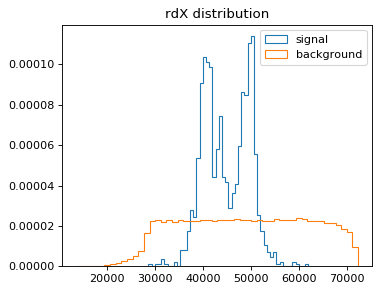

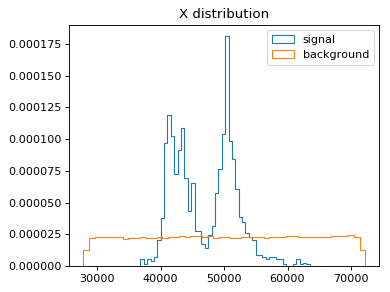

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# get rid of Z
df0 = df.query("brick_number==57")
df0["rdX"]= df0.X - 0.3 * (df0.TX > 0.08)* df0.TX * df0.Z
f_plot(df0, "X")
f_plot(df0, "rdX")

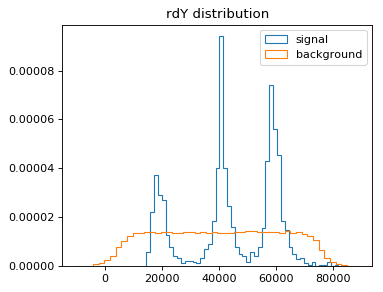

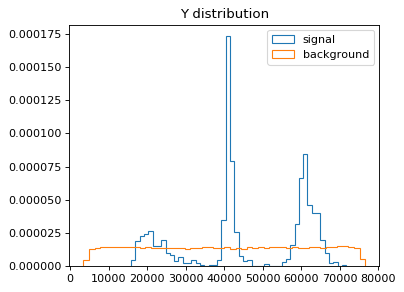

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# get rid of Zo    
df0 = df.query("brick_number==57")
df0["rdY"]= df0.Y - 0.3 * (df0.TY.abs()>0.08) * df0.TY * df0.Z
f_plot(df0, "Y")
f_plot(df0, "rdY")

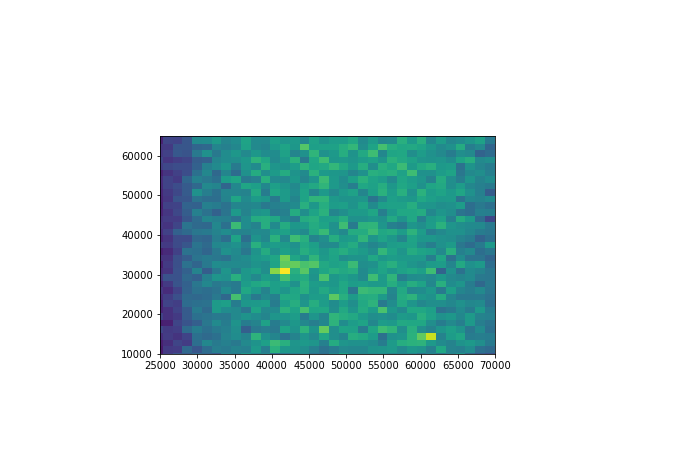

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [85]:
# get rid of Zo    
df0 = df.query("brick_number==99")
cge = 0.5 * ((df0.TY**2 + df0.TX**2) > 0.01)
df0["rdY"]= df0.Y - cge * df0.TY * df0.Z
df0["rdX"]= df0.X - cge * df0.TX * df0.Z
plt.hist2d(df0.rdX, df0.rdY, bins=(70,70))
plt.ylim(1e4, 6.5e4); plt.xlim(2.5e4, 7e4)
plt.show()

In [7]:
# dfs = df.query("signal==1")
# dfs = df.query("event_id == 35528")
# plt.hist2d(dfs.Z, dfs.brick_number, bins=(lz, lb))
# plt.xlabel("Z"); plt.ylabel("Brick #")
# plt.colorbar(); plt.show()

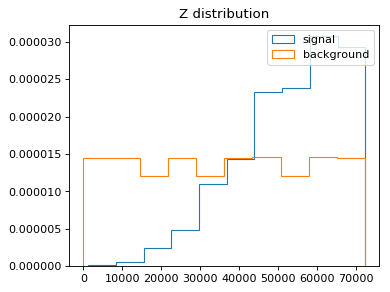

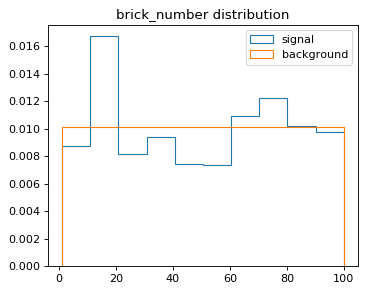

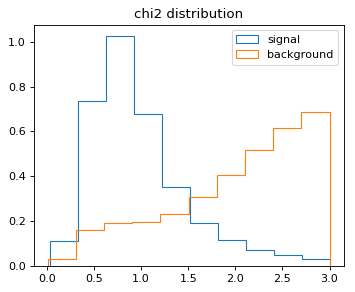

In [8]:
def f_plot(col="chi2"):
    plt.figure(dpi = 80, figsize=(5,4))
    first = plt.hist(df.loc[df.signal == True, col], normed = True, histtype="step", label = 'signal')
    second = plt.hist(df.loc[df.signal == False, col], normed = True, histtype="step", label = 'background')
    plt.title('{} distribution'.format(col))
    plt.legend(); plt.show()
f_plot("chi2"); f_plot("brick_number"); f_plot("Z")

In [29]:
def plot_bg_and_mc(pbg, pmc, id=0, step=1):
    df = pbg
    # mind the order!
    d0 = pd.DataFrame([
                df['Z'][::step],
                df['X'][::step],
                df['Y'][::step]],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['TX'][::step]*dZ,
            df['TY'][::step]*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    # print d0, d1
    C = plt.cm.Blues(0.5)
    lc_bg = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.1, lw=2)

    df = pmc

    # mind the order!
    d0 = pd.DataFrame([
                df['Z'],
                df['X'],
                df['Y']],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['TX']*dZ,
            df['TY']*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    print(d1.shape)
    #print (d0)§
    C = plt.cm.Reds(0.5)
    lc_mc = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.9, lw=2)
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=-50, elev=10)
    ax.add_collection3d(lc_mc)
    ax.add_collection3d(lc_bg)
    
    # mind the order!
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")  
    ax.set_xlim(0, BRICK_Z)
    ax.set_ylim(0, BRICK_X)
    ax.set_zlim(0, BRICK_Y)

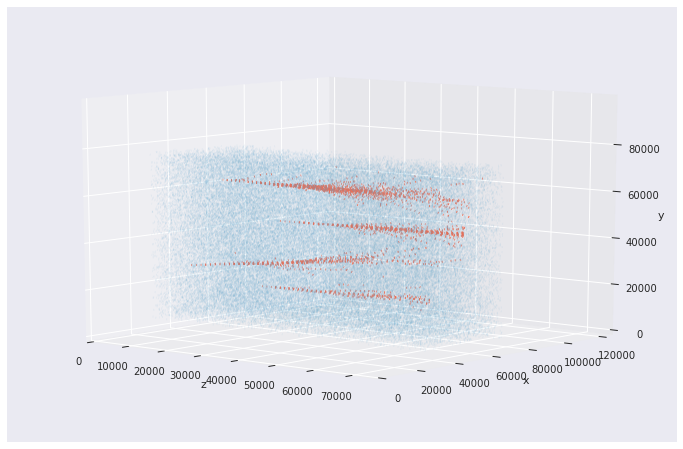

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(2939, 3)


In [30]:
%matplotlib inline
plot_bg_and_mc(df[np.logical_and(df.brick_number == 1, df.signal == 0)], df[np.logical_and(df.brick_number == 1, df.signal == 1)])

In [35]:
train_df = df[df.signal == True].values[:, 1:8]
print(len(train_df))

162209


In [36]:
train_df = np.concatenate([train_df, df[df.signal == False].values[:150000, 1:8]])

In [38]:
len(train_df)
train_df.shape

(312209, 7)

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 5, n_estimators = 100, n_jobs = -1)

In [44]:
clf.fit(train_df[:, :-1], np.array(train_df[:, -1], dtype = int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [45]:
df_test = pd.read_csv('DS_2_test.csv', index_col=0)

In [46]:
df_test.head()

,X,Y,Z,TX,TY,chi2,brick_number
index,,,,,,,
0,57690.351562,40314.937500,47841.0,-0.268973,0.039472,1.113268,9
1,37949.566406,72453.781250,50427.0,0.092281,-0.026488,2.673564,87
2,42897.289062,16920.482422,19395.0,-0.069568,0.044336,2.672163,38
3,54251.625000,48776.027344,20688.0,0.175112,-0.184691,2.369353,39
4,62038.414062,26468.835938,25860.0,-0.259970,-0.155785,2.490212,36


In [47]:
prediction = clf.predict_proba(df_test.values[:, :-1])[:, 1]

In [49]:
baseline = pd.DataFrame(prediction, columns=['Prediction'])
baseline.index.name = 'Id'
baseline.to_csv('baseline.csv', header=True)